In [33]:
%matplotlib inline
import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import statistics

motion = []
time = []

# looping through all the trials
for j in range(2,12):
    m = []
    t = []
    #filename = "E:/Harshavardan/data/24092019_fish1_8dpf_1.5mA_50ms/rawMotion" + str(j) + ".csv"
    filename = "C:/Users/Harshavardan/Desktop/7dpf_1.5mA_50ms_5minITI/rawMotion" + str(j) + ".csv"
    m = [] #stores raw motion
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            m.append(float(row[0]))
    
    #filename = "E:/Harshavardan/data/24092019_fish1_8dpf_1.5mA_50ms/timestamp"+ str(j) + ".csv"
    filename = "C:/Users/Harshavardan/Desktop/7dpf_1.5mA_50ms_5minITI/timestamp" + str(j) + ".csv"
    t = [] #stores timestamp
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            t.append(float(row[0]))
    
    t0 = t[0]
    for i in range(0, len(t)):
        t[i]-=t0
        #t[i]/=1000
    
    motion.append(m)
    time.append(t[1:])    
        


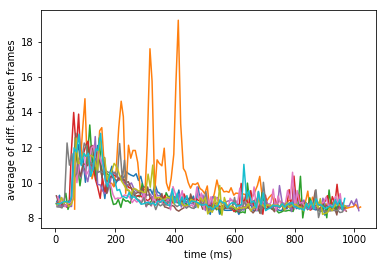

In [149]:
for i in range(0, len(motion)):
    plt.plot(time[i][0:120], motion[i][0:120])
    plt.xlabel("time (ms)")
    plt.ylabel("average of diff. between frames")

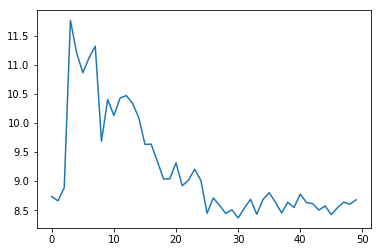

In [155]:
binned = [] # stores the average raw motion value for each bin, for all trials
binnedTrial = [] # stores the averaged raw motion value for individual trials
binSize = 20 # bin size in ms
binn = binSize # which bin are we in right now?
values = [] # stores the values of raw motion in each bin, to be averaged later

for i in range(0, len(motion)):
    
    for j in range(0, len(motion[i])):
        
        if time[i][j] > binn:
            
            if len(values) == 0:
                binnedTrial.append(0)
            
            else:
                binnedTrial.append(statistics.mean(values))
                values = []
                binn += binSize
                values.append(motion[i][j]) # I realised that when this condition is true, a value of raw motion is skipped
            
        else:
            values.append(motion[i][j])
            
    binned.append(binnedTrial)
    
averageMotion = [] # stores the average binned raw motion for this fish.

for i in range(0, len(binned[0])):
    for j in range(0, len(binned)):
        values.append(binned[j][i])
    averageMotion.append(statistics.mean(values))
    values = []
    
plt.plot(averageMotion[0:int(1000/binSize)])

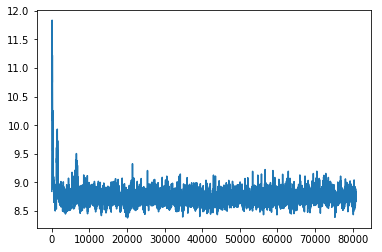

In [93]:
summ = [] # stores the values to be averaged
sumt = [] #
avgm = [] # stores average
avgt = [] #

for j in range(0, 10000):
    for i in range(0,len(motion)):
        summ.append(motion[i][j])
        sumt.append(time[i][j])
    avgm.append(statistics.mean(summ))
    avgt.append(statistics.mean(sumt))
    summ = []
    sumt = []
    
plt.plot(avgt, avgm)
    